In [86]:
# $ conda activate env-alg 

import networkx as nx
import matplotlib.pyplot as plt
import math

In [87]:
nodes = 'ABCDEF'
edges = {'AB':1,'AC':3,'BC':1,'BD':2,'CD':2,'AE':4,'EF':3,'CF':2}

In [88]:
def edges_3tuple(edges):
    '''edges = {'AB':1,'AC':2,'BC':2}'''
    return [(k[0],k[1],{'weight':edges[k]}) for k in edges]

{('A', 'B'): Text(-0.3567756507474342, 0.24312046027667922, '1'),
 ('A', 'C'): Text(-0.07327531263059776, -0.06863126330349434, '3'),
 ('B', 'C'): Text(-0.0926475774023041, 0.45168621019762256, '1'),
 ('B', 'D'): Text(-0.06016278255269844, 0.8817189668888981, '2'),
 ('C', 'D'): Text(0.22333755556413804, 0.5699672433087245, '2'),
 ('A', 'E'): Text(-0.25456163927448494, -0.5929833749225896, '4'),
 ('E', 'F'): Text(0.13343809518329677, -0.8130877035854037, '3'),
 ('C', 'F'): Text(0.31472442182718396, -0.2887355919663085, '2')}

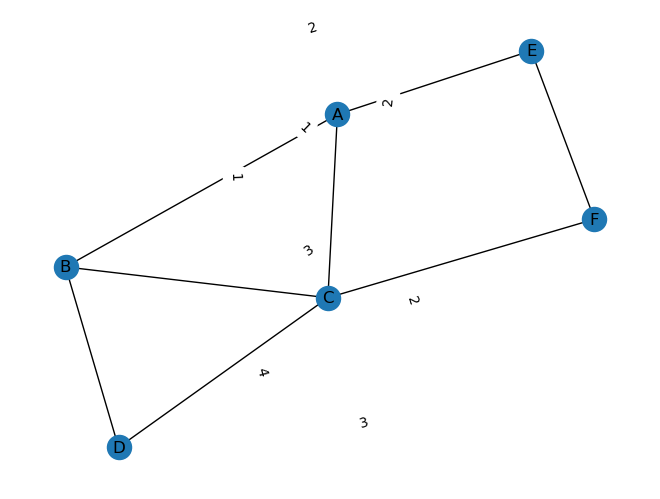

In [89]:
G = nx.Graph()
G.add_nodes_from(nodes)
# G.add_edge('A','B',weight=1)
G.add_edges_from(edges_3tuple(edges)) # edges = [('A','B',{'weight':1}),('A','C',{'weight':2}),('B','C',{'weight':2})]
# print(list(G.nodes))
# print(list(G.edges))
nx.draw(G,with_labels=True,)
pos = nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edges)

In [90]:
# A-> C
start = 'A'
end = 'F'
path = start
# edges = {'AB':1,'AC':3,'BC':1}
# defipe current node
length = 0
stopFlag = False
while stopFlag == False:
    # get subdict of edges from current node
    avail = {e: edges[e] for e in edges if e[0]==path[-1]}
    print('avail is', avail)
    # find node with min edge length
    sort = sorted(avail.items(), key=lambda x: x[1])
    print(sort)
    # print(list(sort))
    next = sort[0][0]   # look from the front to back, where to go when none left
    # next = min(avail,key=edges.get)
    path += next[-1]
    length += avail[next]
    print('n is', path)
    print('l is', length)
    # search from that node
    # if found path to final node, stop
    stopFlag = path[-1] == end
    print(stopFlag)

avail is {'AB': 1, 'AC': 3, 'AE': 4}
[('AB', 1), ('AC', 3), ('AE', 4)]
n is AB
l is 1
False
avail is {'BC': 1, 'BD': 2}
[('BC', 1), ('BD', 2)]
n is ABC
l is 2
False
avail is {'CD': 2, 'CF': 2}
[('CD', 2), ('CF', 2)]
n is ABCD
l is 4
False
avail is {}
[]


IndexError: list index out of range

In [ ]:
S = set()


N = set(nodes)  # set of nodes in graph
# print(N)
E = edges
# print(E)
D = {n: math.inf for n in N} # dict with distances from source node, corresponding to N
# print(D)

# initialise
i = 'A'
D[i] = 0 
# print(D)
S.add(i)  # set of nodes for which shortest paths have been found, in order of length of that path. Start at source node.
# print(S)

S, D = dijkstra(i,E,D,S,N)
print(D)

dest = 'F'
print(f'shortest path from {i} to {dest} is {D[dest]} long')

{'B': 1, 'E': 4, 'C': 2, 'F': 4, 'A': 0, 'D': 3}
shortest path from A to F is 4 long


In [ ]:
def dijkstra(i,E,D,S,N):
    '''Doesn't tell you path steps just length'''
    # look at edges from i
    avail = {e: E[e] for e in E if e[0]==i}
    # print('avail is', avail)
    # replace value in D with min of: 1) existing value, and 2) the dist to i + dist from i to node as seen in avail
    for e in avail:
        j = e[-1]
        # print(j)
        D[j] = min(D[j],D[i]+avail[e])
        # print(D)

    i = nextNode(S,D)
    S.add(i)

    while S!=N: dijkstra(i,E,D,S,N)

    return S,D


def nextNode(S,D):
    # remaining unexplored nodes
    remain = {r: D[r] for r in set(D)-S}
    # print(remain)
    # go to closest node
    i = min(remain,key=remain.get)
    # print(i)
    return i


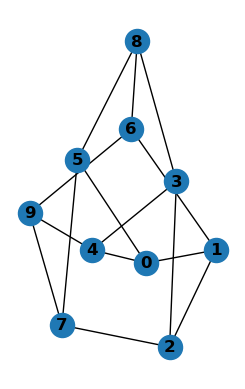

In [ ]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')